# Load kaggle dataset UNSW-NB15

In [ ]:
!pip install -q kaggle 

In [ ]:
 from google.colab import files
 files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"cashyang","key":"27463c8e9a95ca61637778d741a60f69"}'}

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d mrwellsdavid/unsw-nb15

unsw-nb15.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
%ls

'kaggle (1).json'         UNSW-NB15_3.csv
'kaggle (2).json'         UNSW-NB15_4.csv
 kaggle.json              UNSW-NB15_LIST_EVENTS.csv
 NUSW-NB15_features.csv   UNSW_NB15_testing-set.csv
 sample_data/             UNSW_NB15_training-set.csv
 UNSW-NB15_1.csv          unsw-nb15.zip
 UNSW-NB15_2.csv


In [ ]:
!unzip unsw-nb15.zip

Archive:  unsw-nb15.zip
replace NUSW-NB15_features.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace UNSW-NB15_1.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace UNSW-NB15_2.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace UNSW-NB15_3.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace UNSW-NB15_4.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace UNSW-NB15_LIST_EVENTS.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace UNSW_NB15_testing-set.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace UNSW_NB15_training-set.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
import pandas as pd
feature=pd.read_csv('NUSW-NB15_features.csv',encoding='cp1252')
test=pd.read_csv('UNSW_NB15_testing-set.csv')
train=pd.read_csv('UNSW_NB15_training-set.csv')
list_event=pd.read_csv('UNSW-NB15_LIST_EVENTS.csv')
df1=pd.read_csv('UNSW-NB15_1.csv',header=None)
df2=pd.read_csv('UNSW-NB15_2.csv',header=None)
df3=pd.read_csv('UNSW-NB15_3.csv',header=None)
df4=pd.read_csv('UNSW-NB15_4.csv',header=None)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1,3,47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3,39,47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
list_event

,Attack category,Attack subcategory,Number of events
0,normal,NaN,2218761
1,Fuzzers,FTP,558
2,Fuzzers,HTTP,1497
3,Fuzzers,RIP,3550
4,Fuzzers,SMB,5245
...,...,...,...
203,Shellcode,Decoders,18
204,Shellcode,Multiple OS,10
205,Shellcode,Solaris,12
206,Worms,,174


In [ ]:
feature

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,Indicates to the state and its dependent proto...
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


In [ ]:
test.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [ ]:
test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,175341.0,8.767100e+04,5.061673e+04,1.0,43836.000000,87671.000000,1.315060e+05,1.753410e+05
dur,175341.0,1.359389e+00,6.480249e+00,0.0,0.000008,0.001582,6.680690e-01,5.999999e+01
spkts,175341.0,2.029866e+01,1.368876e+02,1.0,2.000000,2.000000,1.200000e+01,9.616000e+03
dpkts,175341.0,1.896959e+01,1.102583e+02,0.0,0.000000,2.000000,1.000000e+01,1.097400e+04
sbytes,175341.0,8.844844e+03,1.747656e+05,28.0,114.000000,430.000000,1.418000e+03,1.296523e+07
dbytes,175341.0,1.492892e+04,1.436542e+05,0.0,0.000000,164.000000,1.102000e+03,1.465555e+07
rate,175341.0,9.540619e+04,1.654010e+05,0.0,32.786140,3225.806520,1.250000e+05,1.000000e+06
sttl,175341.0,1.795470e+02,1.029400e+02,0.0,62.000000,254.000000,2.540000e+02,2.550000e+02
dttl,175341.0,7.960957e+01,1.105069e+02,0.0,0.000000,29.000000,2.520000e+02,2.540000e+02
sload,175341.0,7.345403e+07,1.883574e+08,0.0,13053.338870,879674.750000,8.888889e+07,5.988000e+09


In [ ]:
train.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [ ]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,82332.0,4.116650e+04,2.376735e+04,1.0,20583.750000,4.116650e+04,6.174925e+04,8.233200e+04
dur,82332.0,1.006756e+00,4.710444e+00,0.0,0.000008,1.413800e-02,7.193603e-01,5.999999e+01
spkts,82332.0,1.866647e+01,1.339164e+02,1.0,2.000000,6.000000e+00,1.200000e+01,1.064600e+04
dpkts,82332.0,1.754594e+01,1.155741e+02,0.0,0.000000,2.000000e+00,1.000000e+01,1.101800e+04
sbytes,82332.0,7.993908e+03,1.716423e+05,24.0,114.000000,5.340000e+02,1.280000e+03,1.435577e+07
dbytes,82332.0,1.323379e+04,1.514715e+05,0.0,0.000000,1.780000e+02,9.560000e+02,1.465753e+07
rate,82332.0,8.241089e+04,1.486204e+05,0.0,28.606114,2.650177e+03,1.111111e+05,1.000000e+06
sttl,82332.0,1.809677e+02,1.015134e+02,0.0,62.000000,2.540000e+02,2.540000e+02,2.550000e+02
dttl,82332.0,9.571300e+01,1.166677e+02,0.0,0.000000,2.900000e+01,2.520000e+02,2.530000e+02
sload,82332.0,6.454902e+07,1.798618e+08,0.0,11202.466797,5.770032e+05,6.514286e+07,5.268000e+09


In [ ]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0


In [ ]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,59.166.0.0,6055,149.171.126.5,54145,tcp,FIN,0.072974,4238,60788,31,...,0,13,13,6,7,1,1,2,NaN,0
1,59.166.0.0,7832,149.171.126.3,5607,tcp,FIN,0.144951,5174,91072,31,...,0,13,13,6,7,1,1,2,NaN,0
2,59.166.0.8,11397,149.171.126.6,21,tcp,FIN,0.116107,2934,3742,31,...,1,1,2,7,5,1,1,4,NaN,0
3,59.166.0.0,3804,149.171.126.3,53,udp,CON,0.000986,146,178,31,...,0,13,13,6,7,1,1,2,NaN,0
4,59.166.0.8,14339,149.171.126.6,14724,tcp,FIN,0.038480,8928,320,31,...,0,8,20,7,5,1,1,4,NaN,0


In [ ]:
df3.head()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,59.166.0.1,18247,149.171.126.4,7662,tcp,FIN,0.119596,4550,68342,31,...,,6,2,2,5,1,1,2,NaN,0
1,59.166.0.3,54771,149.171.126.2,27709,tcp,FIN,0.650574,8928,320,31,...,,3,5,2,4,1,1,4,NaN,0
2,59.166.0.8,13289,149.171.126.9,5190,tcp,FIN,0.007980,2158,2464,31,...,,3,5,1,1,1,1,3,NaN,0
3,149.171.126.18,1043,175.45.176.3,53,udp,INT,0.000005,264,0,60,...,,19,19,19,19,19,19,19,NaN,0
4,149.171.126.18,1043,175.45.176.3,53,udp,INT,0.000005,264,0,60,...,,19,19,19,19,19,19,19,NaN,0


In [ ]:
df4.head()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,59.166.0.9,7045,149.171.126.7,25,tcp,FIN,0.201886,37552,3380,31,...,,2,2,7,4,1,1,3,NaN,0
1,59.166.0.9,9685,149.171.126.2,80,tcp,FIN,5.864748,19410,1087890,31,...,,3,1,4,4,1,1,1,NaN,0
2,59.166.0.2,1421,149.171.126.4,53,udp,CON,0.001391,146,178,31,...,,3,5,2,7,1,1,4,NaN,0
3,59.166.0.2,21553,149.171.126.2,25,tcp,FIN,0.053948,37812,3380,31,...,,1,1,4,7,1,1,3,NaN,0
4,59.166.0.8,45212,149.171.126.4,53,udp,CON,0.000953,146,178,31,...,,2,5,2,1,1,1,2,NaN,0


# Preprocess

In [ ]:
data=pd.concat([df1,df2,df3,df4],ignore_index=True)

In [ ]:
data.columns=feature['Name']#I rename the columns of the data table to be the name column in feature table

In [ ]:
data.head()

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0


In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Name,,,,,,,,
dur,2540047.0,6.587916e-01,1.392493e+01,0.000000e+00,1.037000e-03,1.586100e-02,2.145545e-01,8.786638e+03
sbytes,2540047.0,4.339600e+03,5.640599e+04,0.000000e+00,2.000000e+02,1.470000e+03,3.182000e+03,1.435577e+07
dbytes,2540047.0,3.642759e+04,1.610960e+05,0.000000e+00,1.780000e+02,1.820000e+03,1.489400e+04,1.465753e+07
sttl,2540047.0,6.278197e+01,7.462277e+01,0.000000e+00,3.100000e+01,3.100000e+01,3.100000e+01,2.550000e+02
dttl,2540047.0,3.076681e+01,4.285089e+01,0.000000e+00,2.900000e+01,2.900000e+01,2.900000e+01,2.540000e+02
sloss,2540047.0,5.163921e+00,2.251707e+01,0.000000e+00,0.000000e+00,3.000000e+00,7.000000e+00,5.319000e+03
dloss,2540047.0,1.632944e+01,5.659474e+01,0.000000e+00,0.000000e+00,4.000000e+00,1.400000e+01,5.507000e+03
Sload,2540047.0,3.695645e+07,1.186043e+08,0.000000e+00,1.353963e+05,5.893038e+05,2.039923e+06,5.988000e+09
Dload,2540047.0,2.450861e+06,4.224863e+06,0.000000e+00,1.191594e+04,5.893179e+05,2.925974e+06,1.287619e+08


In [ ]:
data.dtypes

Name
srcip                object
sport                object
dstip                object
dsport               object
proto                object
state                object
dur                 float64
sbytes                int64
dbytes                int64
sttl                  int64
dttl                  int64
sloss                 int64
dloss                 int64
service              object
Sload               float64
Dload               float64
Spkts                 int64
Dpkts                 int64
swin                  int64
dwin                  int64
stcpb                 int64
dtcpb                 int64
smeansz               int64
dmeansz               int64
trans_depth           int64
res_bdy_len           int64
Sjit                float64
Djit                float64
Stime                 int64
Ltime                 int64
Sintpkt             float64
Dintpkt             float64
tcprtt              float64
synack              float64
ackdat              float64
is_sm_ips_ports

In [ ]:
data[data['attack_cat'].notnull()]

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
20,175.45.176.3,21223,149.171.126.18,32780,udp,INT,0.000021,728,0,254,...,0,1,1,1,1,1,1,1,Exploits,1
21,175.45.176.2,23357,149.171.126.16,80,tcp,FIN,0.240139,918,25552,62,...,0,3,2,2,1,1,1,1,Exploits,1
22,175.45.176.0,13284,149.171.126.16,80,tcp,FIN,2.390390,1362,268,254,...,0,5,2,2,1,1,1,1,Reconnaissance,1
39,175.45.176.2,13792,149.171.126.16,5555,tcp,FIN,0.175190,8168,268,254,...,0,1,1,1,1,1,1,1,Exploits,1
40,175.45.176.2,26939,149.171.126.10,80,tcp,FIN,0.190600,844,268,254,...,0,3,1,1,1,1,1,1,Exploits,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540027,175.45.176.0,47439,149.171.126.10,53,udp,INT,0.000001,114,0,254,...,,15,15,15,15,15,15,15,Generic,1
2540028,175.45.176.0,17293,149.171.126.17,110,tcp,CON,0.942984,574,676,62,...,,2,1,2,4,2,2,2,Exploits,1
2540029,175.45.176.0,33654,149.171.126.12,80,tcp,CON,2.579405,269883,1300,62,...,,2,1,2,4,2,2,2,DoS,1
2540030,175.45.176.0,33654,149.171.126.12,80,tcp,CON,2.579405,269883,1300,62,...,,1,1,2,4,2,2,2,DoS,1


In [ ]:
def data_preprocessing_attack_cat(data):
    data["attack_cat"] = data["attack_cat"].fillna('Normal')
    #we can learn from the feature to know that if label=0, that mean attacks are normal, and if we check the data table we will know that if label=0, attack_cat is na, therefore we fill na with normal
    data["attack_cat"] = data["attack_cat"].replace(' Fuzzers','Fuzzers')
    data["attack_cat"] = data["attack_cat"].replace(' Fuzzers ','Fuzzers')
    data["attack_cat"] = data["attack_cat"].replace(' Reconnaissance','Reconnaissance')
    data["attack_cat"] = data["attack_cat"].replace(' Reconnaissance ','Reconnaissance')
    data["attack_cat"] = data["attack_cat"].replace(' Shellcode','Shellcode')
    data["attack_cat"] = data["attack_cat"].replace(' Shellcode ','Shellcode')
    data["attack_cat"] = data["attack_cat"].replace('Backdoors','Backdoor')
    #word without any space

    return data

In [ ]:
data=data_preprocessing_attack_cat(data)
data = data.fillna(0)#since the remaining na value is in numerical column, therefore I fill na with 0
data['ct_ftp_cmd']=data['ct_ftp_cmd'].replace(' ',0)
data['ct_ftp_cmd']=data['ct_ftp_cmd'].astype('int64')#Although the data in ct_ftp_cmd column is numerical, but it is actually as object type

In [ ]:
from sklearn.preprocessing import LabelEncoder
def label(data):
  labelencoder = LabelEncoder()
  data['proto']=labelencoder.fit_transform(data['proto'])
  data['state']=labelencoder.fit_transform(data['state'])
  data['service']=labelencoder.fit_transform(data['service'])
  return data

In [ ]:
data=label(data)
data

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,1390,149.171.126.6,53,120,2,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,Normal,0
1,59.166.0.0,33661,149.171.126.9,1024,120,2,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,Normal,0
2,59.166.0.6,1464,149.171.126.7,53,120,2,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,Normal,0
3,59.166.0.5,3593,149.171.126.5,53,120,2,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,Normal,0
4,59.166.0.3,49664,149.171.126.0,53,120,2,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540042,59.166.0.5,33094,149.171.126.7,43433,114,5,0.087306,320,1828,31,...,0,1,2,3,3,1,1,3,Normal,0
2540043,59.166.0.7,20848,149.171.126.4,21,114,2,0.365058,456,346,31,...,2,2,2,2,2,2,2,2,Normal,0
2540044,59.166.0.3,21511,149.171.126.9,21,114,2,6.335154,1802,2088,31,...,2,2,2,4,2,2,2,2,Normal,0
2540045,59.166.0.9,35433,149.171.126.0,80,114,2,2.200934,3498,166054,31,...,0,1,1,2,4,2,2,2,Normal,0


In [ ]:
train = train.drop(["id"], axis=1)
test = test.drop(["id"], axis=1)
#id column dosen't have any meaning

In [ ]:
train=data_preprocessing_attack_cat(train)
test=data_preprocessing_attack_cat(test)

In [ ]:
train.dtypes

dur                  float64
proto                 object
service               object
state                 object
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_ltm       int64
ct_dst_sport_l

In [ ]:
train=label(train)
test=label(test)

# Decision tree 
Since it has a label feature(although it is numerical), I can use it to classify.

Label with only 1 or 0 is easy for me classify.

In [ ]:
X=train.drop('attack_cat',axis=1).iloc[:,:-1]

X.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,0.000011,117,0,4,2,0,496,0,90909.0902,254,...,1,1,1,2,0,0,0,1,2,0
1,0.000008,117,0,4,2,0,1762,0,125000.0003,254,...,1,1,1,2,0,0,0,1,2,0
2,0.000005,117,0,4,2,0,1068,0,200000.0051,254,...,1,1,1,3,0,0,0,1,3,0
3,0.000006,117,0,4,2,0,900,0,166666.6608,254,...,2,2,1,3,0,0,0,2,3,0
4,0.000010,117,0,4,2,0,2126,0,100000.0025,254,...,2,2,1,3,0,0,0,2,3,0


In [ ]:
import numpy as np
np.shape(X)

(82332, 42)

In [ ]:
y = train.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [ ]:
np.shape(y)

(82332,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 0,
                                                    stratify=y)

In [ ]:
performance = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score'])
performance1 = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score'])
performance2 = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score'])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier().fit(X_train,y_train)
y_predictions = model.predict(X_test) # These are the predictions from the test data.

In [ ]:
#accuracy, f1 score, recall and precision 
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix # will plot the confusion matrix
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')
print("Accuracy for train dataset: "+ "{:.2%}".format(accuracy))
print("Recall for train dataset: "+ "{:.2%}".format(recall))
print("Precision for train dataset: "+ "{:.2%}".format(precision))
print("F1-Score for train dataset: "+ "{:.2%}".format(f1s))

Accuracy for train dataset: 96.44%
Recall for train dataset: 96.44%
Precision for train dataset: 96.44%
F1-Score for train dataset: 96.44%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


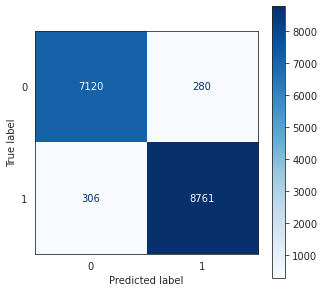

In [ ]:
#plot confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
performance.loc['Decision Tree'] = [accuracy, recall, precision, f1s]
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

Now, I try test data(use the model that fit train data to predict test data)

In [ ]:
testingdataset_x=test.drop('attack_cat',axis=1).iloc[:,:-1]
testingdataset_y=test.iloc[:,-1]

In [ ]:
y_predictions = model.predict(testingdataset_x)

In [ ]:
accuracy = accuracy_score(testingdataset_y, y_predictions)
recall = recall_score(testingdataset_y, y_predictions, average='weighted')
precision = precision_score(testingdataset_y, y_predictions, average='weighted')
f1s = f1_score(testingdataset_y, y_predictions, average='weighted')
print("Accuracy for test dataset: "+ "{:.2%}".format(accuracy))
print("Recall for test dataset: "+ "{:.2%}".format(recall))
print("Precision for test dataset: "+ "{:.2%}".format(precision))
print("F1-Score for test dataset: "+ "{:.2%}".format(f1s))

Accuracy for test dataset: 89.41%
Recall for test dataset: 89.41%
Precision for test dataset: 91.22%
F1-Score for test dataset: 89.68%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


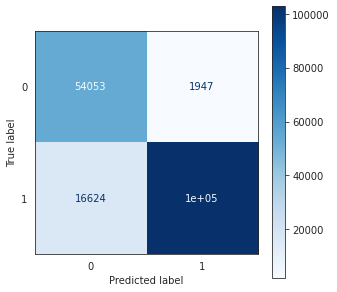

In [ ]:
performance1.loc['Decision Tree'] = [accuracy, recall, precision, f1s]
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model, testingdataset_x, testingdataset_y, cmap=plt.cm.Blues)  
plt.show()

Let's change to combination of UNSW-NB15 1, 2, 3 and 4

In [ ]:
X=data.drop('attack_cat',axis=1).iloc[:,:-1]
X=X.drop(['srcip','sport','dstip','dsport'],axis=1)
#I assume that source port, source ip, destination ip and destination port won't affect the result.  This assumption can make me easier to do classification.
y = data.iloc[:,-1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 0,
                                                    stratify=y)

In [ ]:
model = DecisionTreeClassifier().fit(X_train,y_train)
y_predictions = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')
print("Accuracy for the combination dataset: "+ "{:.2%}".format(accuracy))
print("Recall for the combination dataset: "+ "{:.2%}".format(recall))
print("Precision for the combination dataset: "+ "{:.2%}".format(precision))
print("F1-Score for the combination dataset: "+ "{:.2%}".format(f1s))

Accuracy for the combination dataset: 99.42%
Recall for the combination dataset: 99.42%
Precision for the combination dataset: 99.42%
F1-Score for the combination dataset: 99.42%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


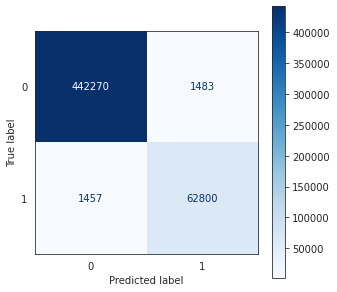

In [ ]:
performance2.loc['Decision Tree'] = [accuracy, recall, precision, f1s]
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

Model design: Descision tree demonstrates a good performance in both confusion matrix, accuracy, etc...

# Logistic regression
Since the label is either 1 or 0, therefore logistic regression could be used.

Try train dataset first

In [ ]:
X=train.drop('attack_cat',axis=1).iloc[:,:-1]
y = train.iloc[:,-1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 0,
                                                    stratify=y)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X_train,y_train)
y_predictions = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')
print("Accuracy for train dataset: "+ "{:.2%}".format(accuracy))
print("Recall for train dataset: "+ "{:.2%}".format(recall))
print("Precision for train dataset: "+ "{:.2%}".format(precision))
print("F1-Score for train dataset: "+ "{:.2%}".format(f1s))

Accuracy for train dataset: 75.32%
Recall for train dataset: 75.32%
Precision for train dataset: 77.51%
F1-Score for train dataset: 75.25%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


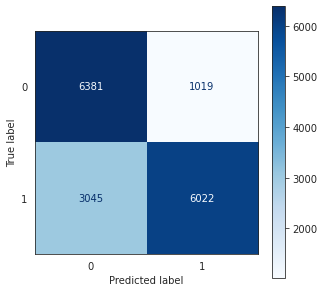

In [ ]:
performance.loc['Logistic regression'] = [accuracy, recall, precision, f1s]
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

Use the model I trained in test dataset to predict test dataset

In [ ]:
testingdataset_x=test.drop('attack_cat',axis=1).iloc[:,:-1]
testingdataset_y=test.iloc[:,-1]
y_predictions = model.predict(testingdataset_x)

In [ ]:
accuracy = accuracy_score(testingdataset_y, y_predictions)
recall = recall_score(testingdataset_y, y_predictions, average='weighted')
precision = precision_score(testingdataset_y, y_predictions, average='weighted')
f1s = f1_score(testingdataset_y, y_predictions, average='weighted')
print("Accuracy for test dataset: "+ "{:.2%}".format(accuracy))
print("Recall for test dataset: "+ "{:.2%}".format(recall))
print("Precision for test dataset: "+ "{:.2%}".format(precision))
print("F1-Score for test dataset: "+ "{:.2%}".format(f1s))

Accuracy for test dataset: 74.38%
Recall for test dataset: 74.38%
Precision for test dataset: 82.75%
F1-Score for test dataset: 75.21%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


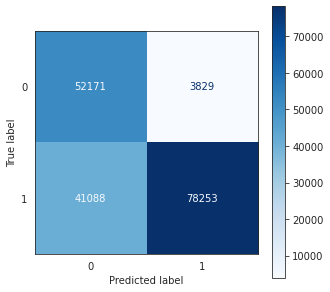

In [ ]:
performance1.loc['Logistic regression'] = [accuracy, recall, precision, f1s]
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model, testingdataset_x, testingdataset_y, cmap=plt.cm.Blues)  
plt.show()

For the combination dataset

In [ ]:
X=data.drop('attack_cat',axis=1).iloc[:,:-1]
X=X.drop(['srcip','sport','dstip','dsport'],axis=1)
#I assume that source port, source ip, destination ip and destination port won't affect the result.  This assumption can make me easier to do classification.
y = data.iloc[:,-1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 0,
                                                    stratify=y)

In [ ]:
model = LogisticRegression().fit(X_train,y_train)
y_predictions = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')
print("Accuracy for the combination dataset: "+ "{:.2%}".format(accuracy))
print("Recall for the combination dataset: "+ "{:.2%}".format(recall))
print("Precision for the combination dataset: "+ "{:.2%}".format(precision))
print("F1-Score for the combination dataset: "+ "{:.2%}".format(f1s))

Accuracy for the combination dataset: 91.33%
Recall for the combination dataset: 91.33%
Precision for the combination dataset: 90.50%
F1-Score for the combination dataset: 90.35%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


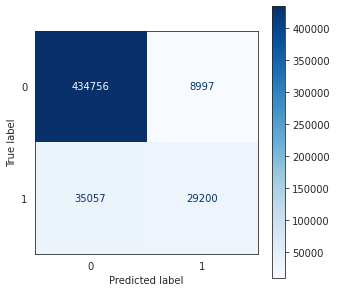

In [ ]:
performance2.loc['Logistic regression'] = [accuracy, recall, precision, f1s]
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

Model design:Not that well compare to decision tree

# Random forest

Train dataset first

In [ ]:
X=train.drop('attack_cat',axis=1).iloc[:,:-1]
y = train.iloc[:,-1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 0,
                                                    stratify=y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, criterion = 'gini').fit(X_train,y_train)
y_predictions = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy for train dataset: "+ "{:.2%}".format(accuracy))
print("Recall for train dataset: "+ "{:.2%}".format(recall))
print("Precision for train dataset: "+ "{:.2%}".format(precision))
print("F1-Score for train dataset: "+ "{:.2%}".format(f1s))

Accuracy for train dataset: 97.70%
Recall for train dataset: 97.70%
Precision for train dataset: 97.71%
F1-Score for train dataset: 97.70%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


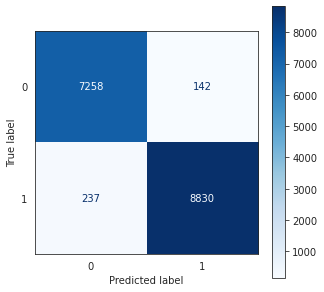

In [ ]:
performance.loc['Random Forest'] = [accuracy, recall, precision, f1s]
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

In [ ]:
testingdataset_x=test.drop('attack_cat',axis=1).iloc[:,:-1]
testingdataset_y=test.iloc[:,-1]
y_predictions = model.predict(testingdataset_x)

In [ ]:
accuracy = accuracy_score(testingdataset_y, y_predictions)
recall = recall_score(testingdataset_y, y_predictions, average='weighted')
precision = precision_score(testingdataset_y, y_predictions, average='weighted')
f1s = f1_score(testingdataset_y, y_predictions, average='weighted')
print("Accuracy for test dataset: "+ "{:.2%}".format(accuracy))
print("Recall for test dataset: "+ "{:.2%}".format(recall))
print("Precision for test dataset: "+ "{:.2%}".format(precision))
print("F1-Score for test dataset: "+ "{:.2%}".format(f1s))

Accuracy for test dataset: 90.26%
Recall for test dataset: 90.26%
Precision for test dataset: 92.00%
F1-Score for test dataset: 90.50%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


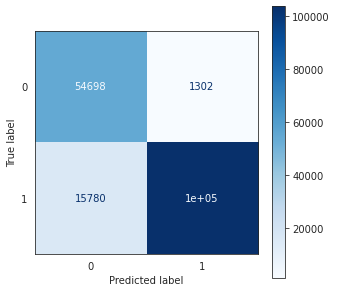

In [ ]:
performance1.loc['Random Forest'] = [accuracy, recall, precision, f1s]
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model, testingdataset_x, testingdataset_y, cmap=plt.cm.Blues)  
plt.show()

I skipped combination dataset becuase it will run too long.

Model design:Similar to decision tree

In [ ]:
performance.style.background_gradient(cmap='coolwarm').format({'Accuracy': '{:.2%}',
                                                                     'Precision': '{:.2%}',
                                                                     'Recall': '{:.2%}',
                                                                     'F1-Score': '{:.2%}'
                                                                     })#for ting dataset

,Accuracy,Recall,Precision,F1-Score
Decision Tree,96.44%,96.44%,96.44%,96.44%
Logistic regression,75.32%,75.32%,77.51%,75.25%
Random Forest,97.70%,97.70%,97.71%,97.70%


In [ ]:
performance1.style.background_gradient(cmap='coolwarm').format({'Accuracy': '{:.2%}',
                                                                     'Precision': '{:.2%}',
                                                                     'Recall': '{:.2%}',
                                                                     'F1-Score': '{:.2%}'
                                                                     })#for testing dataset

,Accuracy,Recall,Precision,F1-Score
Decision Tree,89.41%,89.41%,91.22%,89.68%
Logistic regression,74.38%,74.38%,82.75%,75.21%
Random Forest,90.26%,90.26%,92.00%,90.50%


In [ ]:
performance2.style.background_gradient(cmap='coolwarm').format({'Accuracy': '{:.2%}',
                                                                     'Precision': '{:.2%}',
                                                                     'Recall': '{:.2%}',
                                                                     'F1-Score': '{:.2%}'
                                                                     })#for combination dataset

,Accuracy,Recall,Precision,F1-Score
Decision Tree,99.42%,99.42%,99.42%,99.42%
Logistic regression,91.33%,91.33%,90.50%,90.35%


# Neural Network
Simple neural network

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tensorflow.keras.models import Sequential
from keras import metrics
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf

In [ ]:
nn=Sequential()
nn.add(Dense(10,input_dim=42,activation='relu'))
nn.add(Dense(10,activation='softmax'))
nn.add(Dropout(0.2))
nn.add(Dense(10,activation='relu'))
nn.add(Dense(2,activation='softmax'))#label 1 or 0
nn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 10)                430       
                                                                 
 dense_16 (Dense)            (None, 10)                110       
                                                                 
 dropout_4 (Dropout)         (None, 10)                0         
                                                                 
 dense_17 (Dense)            (None, 10)                110       
                                                                 
 dense_18 (Dense)            (None, 2)                 22        
                                                                 
Total params: 672
Trainable params: 672
Non-trainable params: 0
_________________________________________________________________


In [ ]:
nn.compile(loss='sparse_categorical_crossentropy', optimizer=tf.optimizers.Adam(learning_rate=0.1), 
                  metrics=['accuracy']
                 )

In [ ]:
X=train.drop('attack_cat',axis=1).iloc[:,:-1]
y = train.iloc[:,-1]

In [ ]:
history=nn.fit(X, y, epochs=50, batch_size=200,verbose=2,validation_split=0.2)

Epoch 1/50
330/330 - 2s - loss: 0.5235 - accuracy: 0.7161 - val_loss: 1.0783 - val_accuracy: 0.4375 - 2s/epoch - 5ms/step
Epoch 2/50
330/330 - 1s - loss: 0.5876 - accuracy: 0.6959 - val_loss: 1.1825 - val_accuracy: 0.0000e+00 - 698ms/epoch - 2ms/step
Epoch 3/50
330/330 - 1s - loss: 0.5864 - accuracy: 0.6966 - val_loss: 1.2411 - val_accuracy: 0.0000e+00 - 708ms/epoch - 2ms/step
Epoch 4/50
330/330 - 1s - loss: 0.5897 - accuracy: 0.6917 - val_loss: 1.2707 - val_accuracy: 0.0000e+00 - 686ms/epoch - 2ms/step
Epoch 5/50
330/330 - 1s - loss: 0.5878 - accuracy: 0.6938 - val_loss: 1.2527 - val_accuracy: 0.0000e+00 - 732ms/epoch - 2ms/step
Epoch 6/50
330/330 - 1s - loss: 0.5872 - accuracy: 0.6939 - val_loss: 1.2405 - val_accuracy: 0.0000e+00 - 673ms/epoch - 2ms/step
Epoch 7/50
330/330 - 1s - loss: 0.5872 - accuracy: 0.6962 - val_loss: 1.3056 - val_accuracy: 0.0000e+00 - 680ms/epoch - 2ms/step
Epoch 8/50
330/330 - 1s - loss: 0.5883 - accuracy: 0.6945 - val_loss: 1.0459 - val_accuracy: 0.4375 - 67

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
45,0.586707,0.695180,1.359685,0.0,45
46,0.588276,0.695164,1.161291,0.0,46
47,0.586737,0.696607,1.227449,0.0,47
48,0.588656,0.693282,1.170697,0.0,48
49,0.588367,0.696075,1.191808,0.0,49


In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 2])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

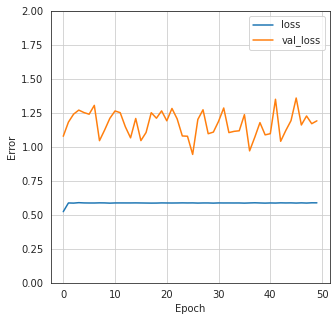

In [ ]:
plot_loss(history)

In [ ]:
def plot_accuracy(history):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.ylim([0, 1])
  plt.xlabel('Epoch')
  plt.ylabel('Acc')
  plt.legend()
  plt.grid(True)

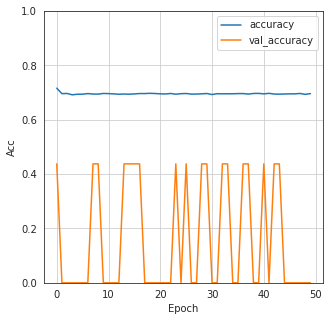

In [ ]:
plot_accuracy(history)

In [ ]:
testingdataset_x=test.drop('attack_cat',axis=1).iloc[:,:-1]
testingdataset_y=test.iloc[:,-1]
y_predictions = model.predict(testingdataset_x)

In [ ]:
accuracy = accuracy_score(testingdataset_y, y_predictions)
recall = recall_score(testingdataset_y, y_predictions, average='weighted')
precision = precision_score(testingdataset_y, y_predictions, average='weighted')
f1s = f1_score(testingdataset_y, y_predictions, average='weighted')
print("Accuracy for test dataset: "+ "{:.2%}".format(accuracy))
print("Recall for test dataset: "+ "{:.2%}".format(recall))
print("Precision for test dataset: "+ "{:.2%}".format(precision))
print("F1-Score for test dataset: "+ "{:.2%}".format(f1s))

Accuracy for test dataset: 90.26%
Recall for test dataset: 90.26%
Precision for test dataset: 92.00%
F1-Score for test dataset: 90.50%


This time, apart from using label column to do model training, I want to use attack_cat column to do model training.

In [ ]:
train_df=pd.read_csv('UNSW_NB15_training-set.csv')
test_df=pd.read_csv('UNSW_NB15_testing-set.csv')

In [ ]:
#preprocess
labelencoder = LabelEncoder()
train_df['attack_cat']=labelencoder.fit_transform(train_df['attack_cat'])
test_df['attack_cat']=labelencoder.fit_transform(test_df['attack_cat'])

In [ ]:
train_df['attack_cat'].value_counts()

6    37000
5    18871
3    11132
4     6062
2     4089
7     3496
0      677
1      583
8      378
9       44
Name: attack_cat, dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
transformer = make_column_transformer(
    (OneHotEncoder(drop='first'), ['service','proto','state']),
    remainder='passthrough')
onehotencoder=OneHotEncoder()

In [ ]:
new_train=transformer.fit_transform(train_df).toarray()
new_train=pd.DataFrame(new_train,columns=transformer.get_feature_names())
new_train

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,onehotencoder__x0_dhcp,onehotencoder__x0_dns,onehotencoder__x0_ftp,onehotencoder__x0_ftp-data,onehotencoder__x0_http,onehotencoder__x0_irc,onehotencoder__x0_pop3,onehotencoder__x0_radius,onehotencoder__x0_smtp,onehotencoder__x0_snmp,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0,6.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0,6.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,3.0,0.0,0.0,0.0,1.0,3.0,0.0,6.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,3.0,0.0,0.0,0.0,2.0,3.0,0.0,6.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,3.0,0.0,0.0,0.0,2.0,3.0,0.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,0.0,0.0,0.0,2.0,1.0,0.0,6.0,0.0
82328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,3.0,2.0,0.0,6.0,0.0
82329,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,6.0,0.0
82330,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,6.0,0.0


In [ ]:
new_test=transformer.fit_transform(test_df).toarray()
new_test=pd.DataFrame(new_test,columns=transformer.get_feature_names())
new_test

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,onehotencoder__x0_dhcp,onehotencoder__x0_dns,onehotencoder__x0_ftp,onehotencoder__x0_ftp-data,onehotencoder__x0_http,onehotencoder__x0_irc,onehotencoder__x0_pop3,onehotencoder__x0_radius,onehotencoder__x0_smtp,onehotencoder__x0_snmp,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,6.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,0.0,0.0,0.0,1.0,6.0,0.0,6.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,3.0,0.0,0.0,0.0,2.0,6.0,0.0,6.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,3.0,1.0,1.0,0.0,2.0,1.0,0.0,6.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,40.0,0.0,0.0,0.0,2.0,39.0,0.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13.0,24.0,0.0,0.0,0.0,24.0,24.0,0.0,5.0,1.0
175337,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,8.0,1.0
175338,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,13.0,0.0,0.0,0.0,3.0,12.0,0.0,5.0,1.0
175339,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.0,30.0,0.0,0.0,0.0,30.0,30.0,0.0,5.0,1.0


In [ ]:
X=new_train.drop(['label','attack_cat'],axis=1)
y=new_train['label']

In [ ]:
nn=Sequential()
nn.add(Dense(128, activation = "relu",input_dim=188))
nn.add(Dense(64, activation='relu'))
nn.add(Dropout(0.25))
nn.add(Dense(32, activation='relu'))
nn.add(Dense(10, activation='softmax'))#We have 10 categories
nn.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_103 (Dense)           (None, 128)               24192     
                                                                 
 dense_104 (Dense)           (None, 64)                8256      
                                                                 
 dropout_25 (Dropout)        (None, 64)                0         
                                                                 
 dense_105 (Dense)           (None, 32)                2080      
                                                                 
 dense_106 (Dense)           (None, 10)                330       
                                                                 
Total params: 34,858
Trainable params: 34,858
Non-trainable params: 0
_________________________________________________________________


In [ ]:
nn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', 
                  metrics=["sparse_categorical_accuracy"]
                 )

In [ ]:
history=nn.fit(X, y, epochs=20,batch_size=120,verbose=2,validation_split=0.2)

Epoch 1/20
549/549 - 2s - loss: 2444683.5000 - sparse_categorical_accuracy: 0.7216 - val_loss: 18636.7422 - val_sparse_categorical_accuracy: 0.0346 - 2s/epoch - 4ms/step
Epoch 2/20
549/549 - 1s - loss: 172.0197 - sparse_categorical_accuracy: 0.7423 - val_loss: 7.3765 - val_sparse_categorical_accuracy: 0.0732 - 1s/epoch - 3ms/step
Epoch 3/20
549/549 - 1s - loss: 8.3578 - sparse_categorical_accuracy: 0.7599 - val_loss: 18.6241 - val_sparse_categorical_accuracy: 0.0346 - 1s/epoch - 3ms/step
Epoch 4/20
549/549 - 2s - loss: 3.2163 - sparse_categorical_accuracy: 0.7607 - val_loss: 13.0426 - val_sparse_categorical_accuracy: 0.0531 - 2s/epoch - 3ms/step
Epoch 5/20
549/549 - 2s - loss: 2.7404 - sparse_categorical_accuracy: 0.7602 - val_loss: 13.5957 - val_sparse_categorical_accuracy: 0.0432 - 2s/epoch - 3ms/step
Epoch 6/20
549/549 - 2s - loss: 4.0182 - sparse_categorical_accuracy: 0.7593 - val_loss: 13.9664 - val_sparse_categorical_accuracy: 0.0397 - 2s/epoch - 3ms/step
Epoch 7/20
549/549 - 1s 

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,sparse_categorical_accuracy,val_loss,val_sparse_categorical_accuracy,epoch
15,0.590739,0.745115,35.730976,0.034554,15
16,0.628986,0.745464,35.652161,0.034493,16
17,0.563895,0.745540,35.684948,0.034554,17
18,0.550044,0.745570,35.675518,0.034554,18
19,0.561988,0.746664,35.704887,0.034554,19


Model design:It seems that neural network is not a good model.